In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [15]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [21]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
print(len(class_labels))

10


Text(0.5, 1.0, 'Dress')

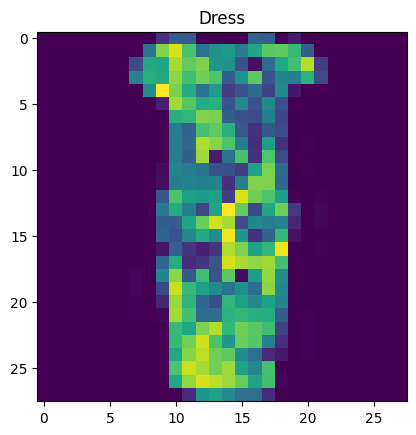

In [16]:
plt.imshow(X_test[0])
plt.title(class_labels[y_test[0]])
plt.imshow(X_test[1])
plt.title(class_labels[y_test[1]])
plt.imshow(X_test[100])
plt.title(class_labels[y_test[100]])

In [29]:
#정규화
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

#model 만들기 128->64->32->10

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(32, activation = 'relu'),
    Dense(10, activation = 'softmax')
])
model.summary()

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(X_train_scaled, y_train, epochs = 5)

prediction = model.predict(X_test_scaled)
print(prediction[100])
print(np.argmax(prediction[100]))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7660 - loss: 0.6668
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8604 - loss: 0.3801
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8775 - loss: 0.3306
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8832 - loss: 0.3114
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8894 - loss: 0.2938
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[2.7476405e-03 6.8688265e-04 3.0493972e-04 9.9426538e-01 1.0236034e-04
 1.4897905e-07 1.8125576e-03 2.3266118e-08 8.0015590e-05 4.6274174e-08]
3



```
카테고리로 나눌 때
[남자, 여자, 중성]
  0      1     2  -> 남자 0대신 -> [1, 0, 0]
                     여자       -> [0, 1, 0]

이런 식으로 y_train, y_test 합해서 70000개를 이런 식으로 바꿔주기
=>one_hot_encoding사용하기

오차가 크게 의미가 없는 틀린 거 자체가 중요하니까 이런 방식으로 계산하게 만들어줌. 카테고리는 맞는 거 아니면 틀린 거니까
```



In [31]:
#one_hot_encoding

from tensorflow.keras.utils import to_categorical

y_train_ohe = to_categorical(y_train)
print(y_train_ohe[0])
#y_train의 정답 9번 ankle boot
print(y_train[0])
y_test_ohe = to_categorical(y_test)
#loss = 'categorical_crossentropy'로 계산방식 바꿔줘야함.


[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
9
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
9


In [32]:
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [33]:
model.fit(X_train_scaled, y_train_ohe, epochs = 5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8945 - loss: 0.2819
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8989 - loss: 0.2658
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9039 - loss: 0.2574
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9068 - loss: 0.2495
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9077 - loss: 0.2411


In [39]:
prediction = model.predict(X_test_scaled)
print(prediction.shape)

print(prediction[9])
print(np.argmax(prediction[9]))
print(y_test[9])

print(prediction[10])
print(np.argmax(prediction[10]))
print(y_test[10])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
(10000, 10)
[1.24136468e-09 1.46425165e-08 1.05369367e-08 6.05213799e-08
 1.95348512e-12 1.90031808e-03 1.30873623e-09 9.96056437e-01
 3.04957484e-06 2.04009842e-03]
7
7
[8.8229819e-05 1.9793997e-04 4.9468469e-02 1.8738917e-04 9.2610395e-01
 1.7429276e-05 2.3882708e-02 4.2240192e-10 4.9789280e-05 4.1072472e-06]
4
4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[[3.30999583e-01 3.01692315e-04 5.68556488e-02 2.70174257e-02
  2.58309897e-02 1.21340744e-01 3.65525186e-01 5.90435648e-03
  6.62183538e-02 6.05353171e-06]]
6


Text(0.5, 1.0, 'Shirt')

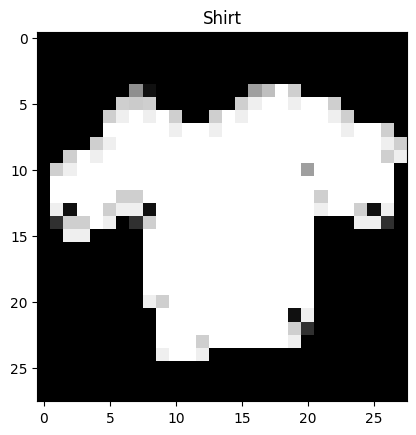

In [51]:
tshirt = plt.imread('/content/tshirt.png')
img = cv2.imread('/content/tshirt.png')
img = cv2.cvtColor(tshirt, cv2.COLOR_BGR2GRAY)
#plt.imshow(img, cmap = 'gray')

img_scaled = img/ 255.0

img_input = np.expand_dims(img_scaled, axis = 0)

pred = model.predict(img_input)

plt.imshow(img, cmap = 'gray')
print(pred)
print(np.argmax(pred))
plt.title(class_labels[np.argmax(pred)])